In [ ]:
import pandas as pd
# Load the dataset
diabetes_dataset = pd.read_csv("diabetes.csv")

length_of_dataset = len(diabetes_dataset)
print("Number of entries:", length_of_dataset)

Number of entries: 768


In [ ]:
#checking the data and displaying the first 5 rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#summarize the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#data present
rows, columns = diabetes_dataset.shape
print("The dataset has", rows, "rows and", columns, "columns.")


The dataset has 768 rows and 9 columns.


In [ ]:
import numpy as np
#Finding out the number of missing data
diabetes_dataset.replace('0',np.nan, inplace=True)
missing_values = diabetes_dataset.isnull().sum().sum()
print("Number of unknown/missing values in dataset:", missing_values)

Number of unknown/missing values in dataset: 0


## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_value = diabetes_dataset.corr()
attributes = correlation_value['Outcome'].sort_values(ascending=False)
correlation_attribute = attributes.index[1:8]
print(correlation_attribute)

Index(['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction',
       'Insulin', 'SkinThickness'],
      dtype='object')


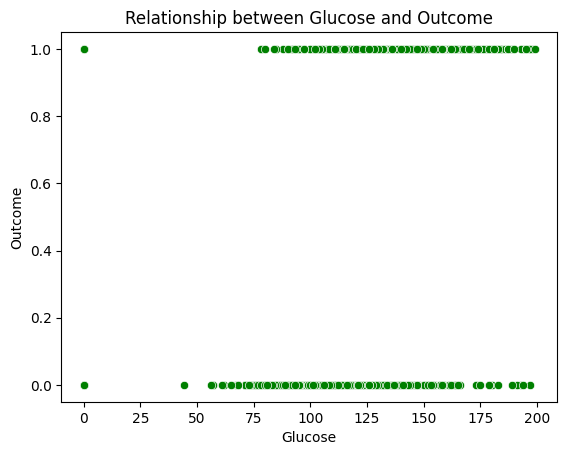

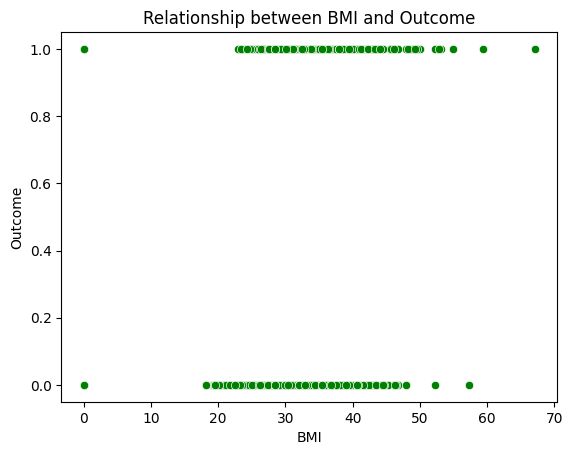

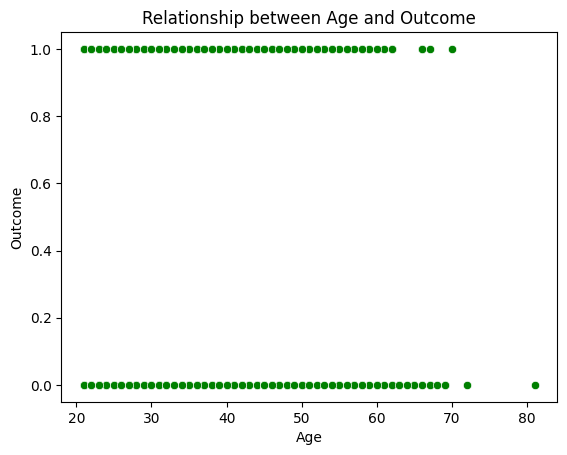

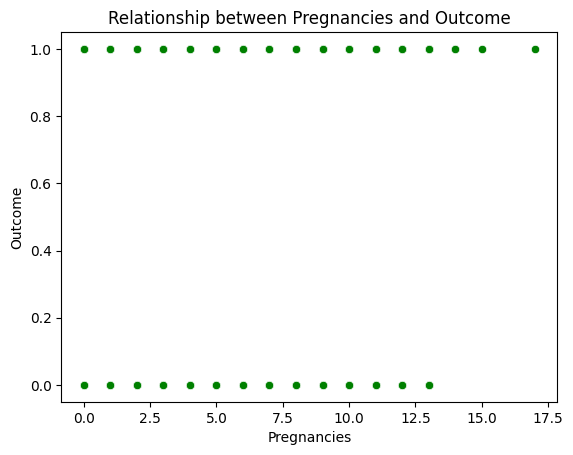

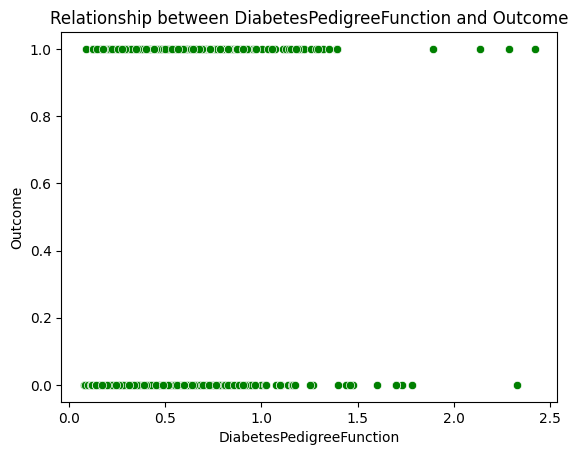

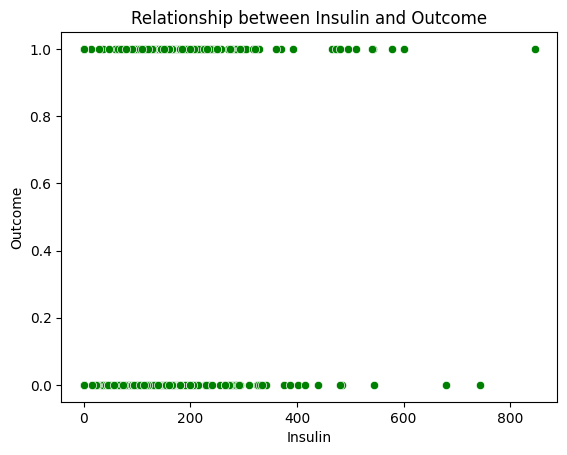

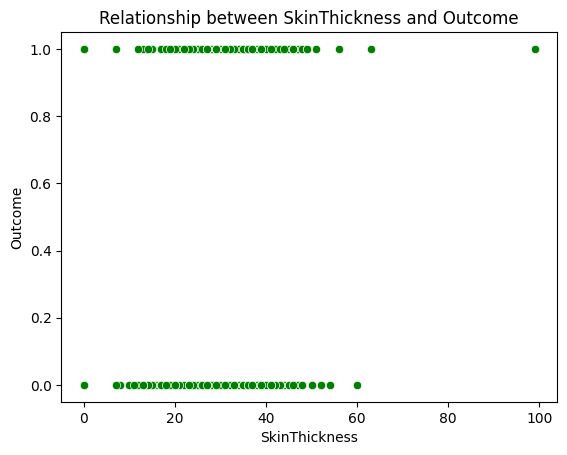

In [ ]:
for item in correlation_attribute:
    plt.figure()
    sns.scatterplot(x=diabetes_dataset[item], y=diabetes_dataset['Outcome'], color="green")
    plt.title(f'Relationship between {item} and Outcome')
    plt.show()

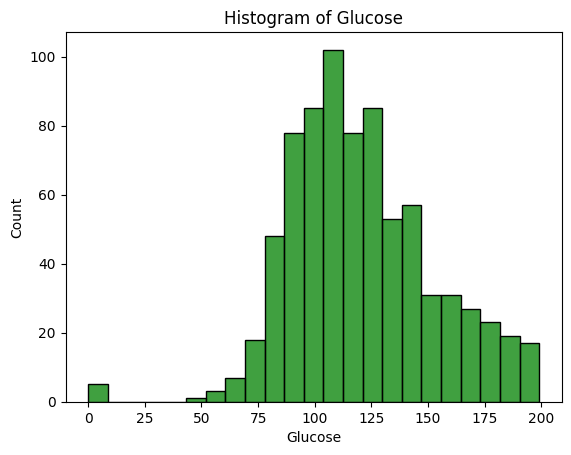

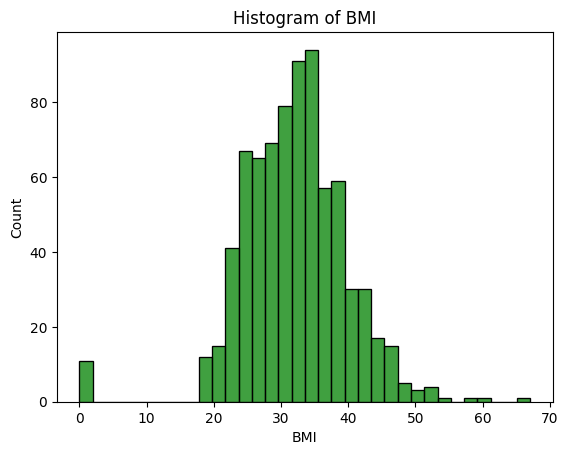

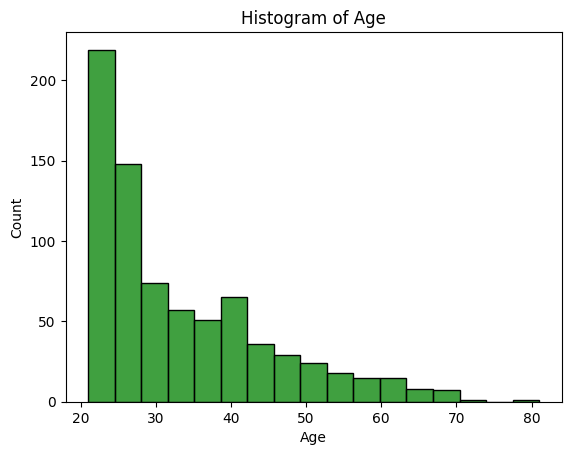

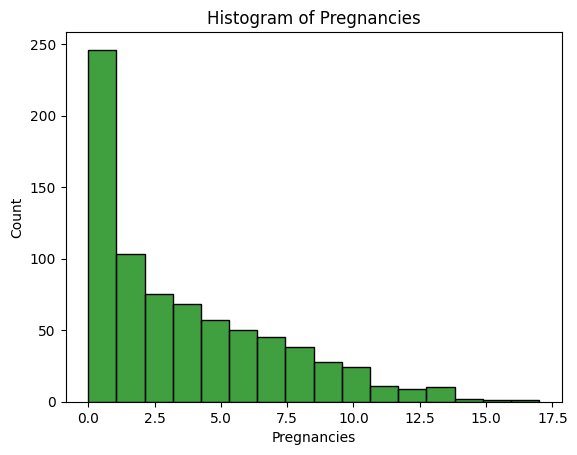

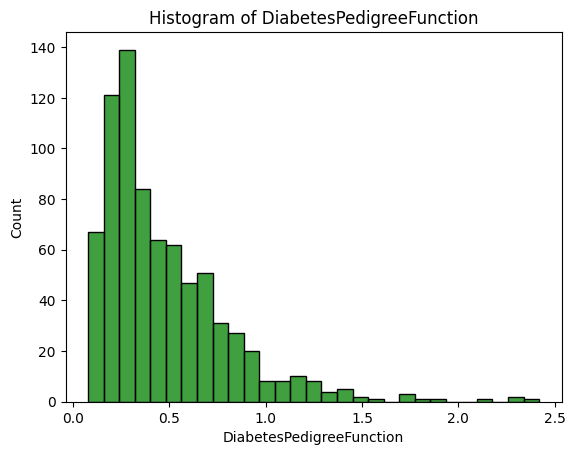

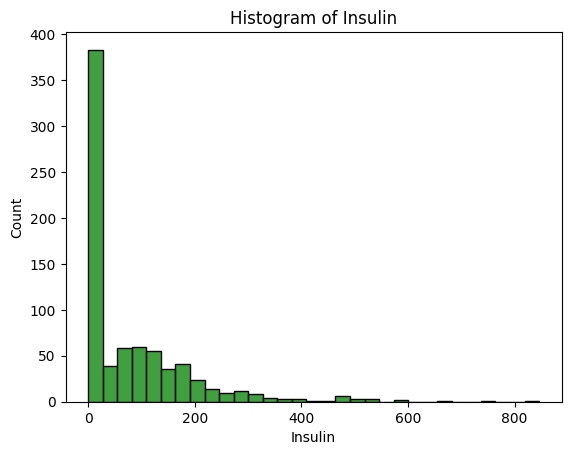

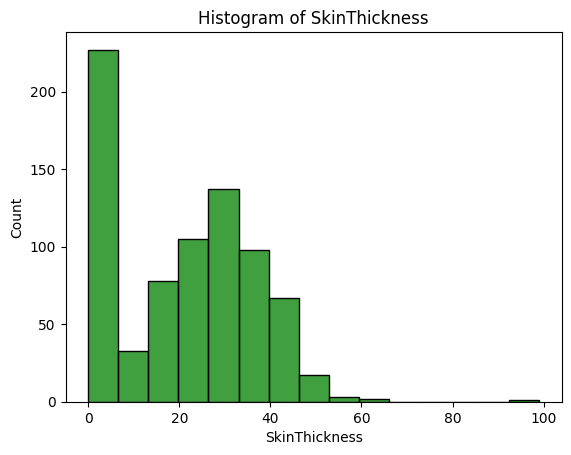

In [ ]:
for item in correlation_attribute:
    plt.figure()
    sns.histplot(diabetes_dataset[item], color="green")
    plt.title(f'Histogram of {item}')
    plt.show()

## Handling Outliers
Let's next look for any anomalies in the collection. Extreme values known as outliers can distort the data and impair the machine learning model's precision.
Using box plots, we can look for anomalies in the numerical fields of the dataset.
In order to show any anomalies, this will produce a box diagram for each number column in the dataset. Based on our research, we can then determine how to deal with the outliers.


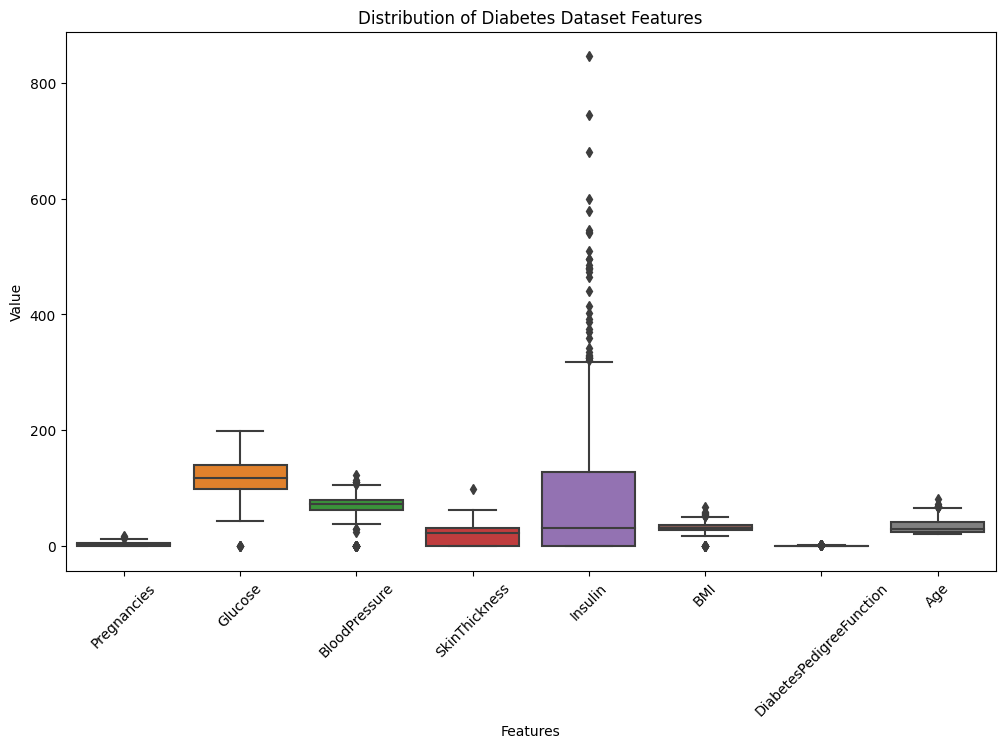

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))

# Create the boxplot
sns.boxplot(data=diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], ax=ax)

ax.set_title("Distribution of Diabetes Dataset Features")
ax.set_xlabel('Features')
ax.set_ylabel('Value')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Handling Categorical Variables

Now we are checking if there are any categorical variables in the dataset. Categorical variables are variables that can take on a limited number of values, such as 'Male' or 'Female'.

We can check for categorical variables using the dtypes function in pandas.

This will print the data type for each column in the dataset. If any of the columns are of type 'object', we can assume that they are categorical variables and handle them appropriately.

In our case, we don't have any categorical variables in the dataset.

In [ ]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

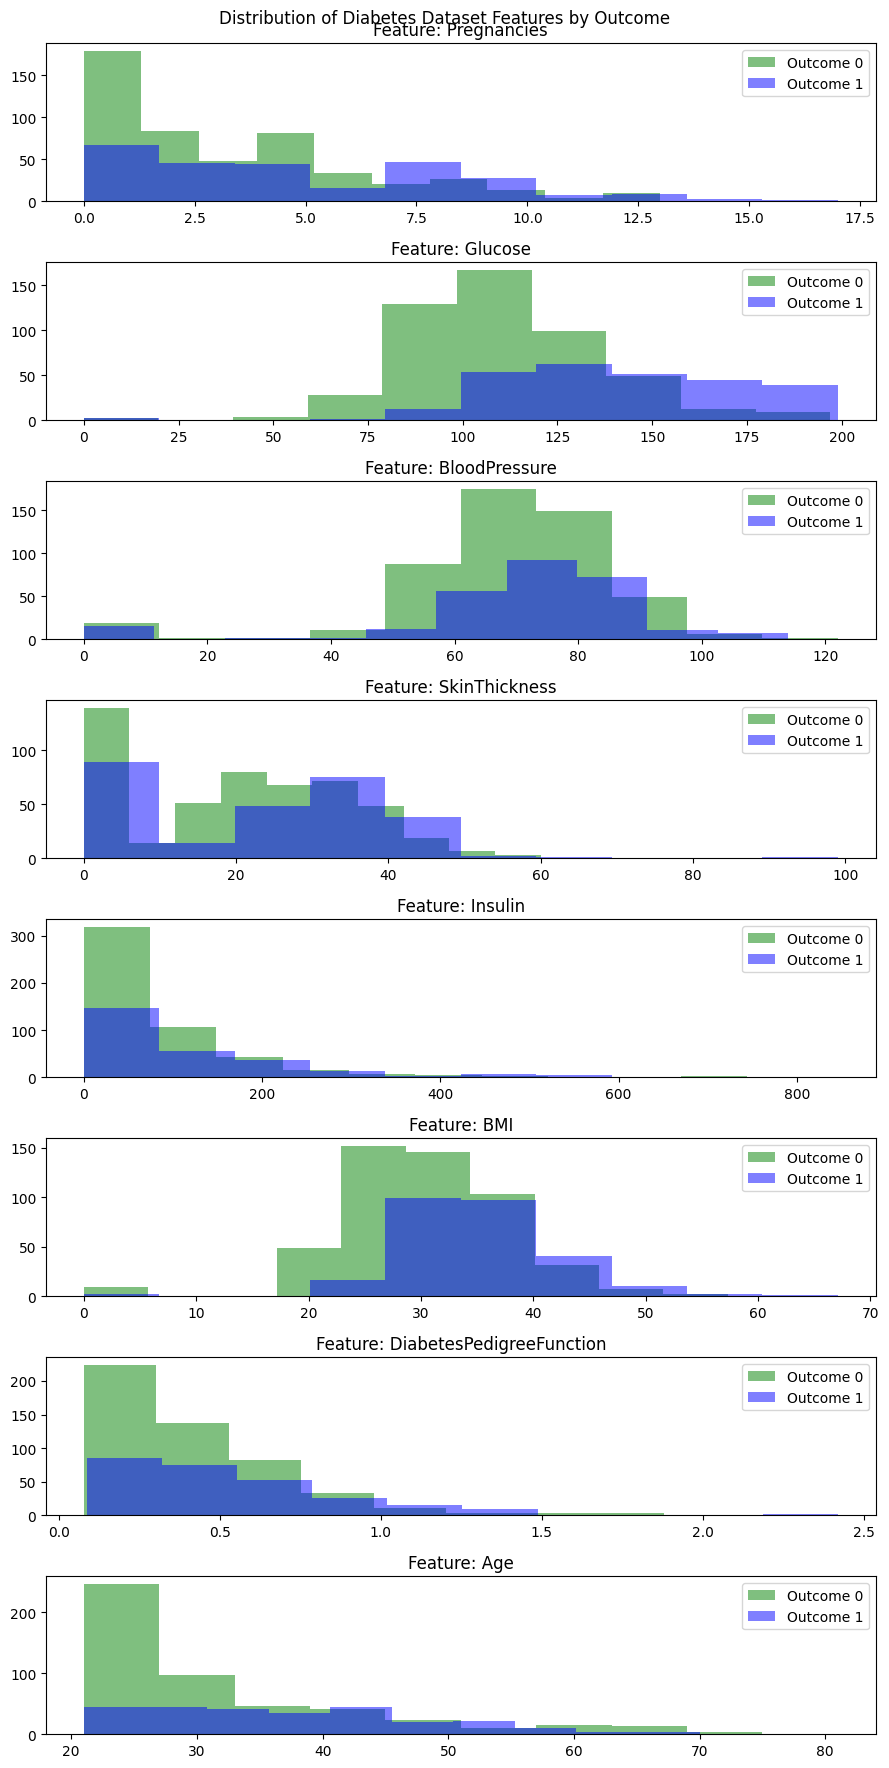

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(9, 18))

for i, feature in enumerate(diabetes_dataset.columns[:-1]):
    axes[i].hist(diabetes_dataset[feature][diabetes_dataset['Outcome'] == 0], bins=10, alpha=0.5, label='Outcome 0', color="green")
    axes[i].hist(diabetes_dataset[feature][diabetes_dataset['Outcome'] == 1], bins=10, alpha=0.5, label='Outcome 1', color="blue")
    axes[i].set_title("Feature: {}".format(feature))
    axes[i].legend()
    
plt.suptitle("Distribution of Diabetes Dataset Features by Outcome")
plt.tight_layout()
plt.show()


Next, we can create a correlation heatmap to visualize the correlation between different variables in the dataset using the heatmap() function from seaborn.

This will create a heatmap of the correlation between each numerical column in the dataset. The annot=True argument will display the correlation coefficients in each cell of the heatmap.

The heatmap for the diabetes dataset shows that there is a positive correlation between Age and Pregnancies, Glucose, BloodPressure, BMI, and Outcome. There is also a positive correlation between BMI and SkinThickness and Insulin. 


Pregnancies and Age is highly correlated.

Additionally, there is a weak positive correlation between Glucose and Outcome, but no significant correlation between DiabetesPedigreeFunction and any of the other features. The heatmap can help us identify which features are more strongly correlated with each other and with the outcome variable, which can help us in selecting relevant features for building the predictive model.

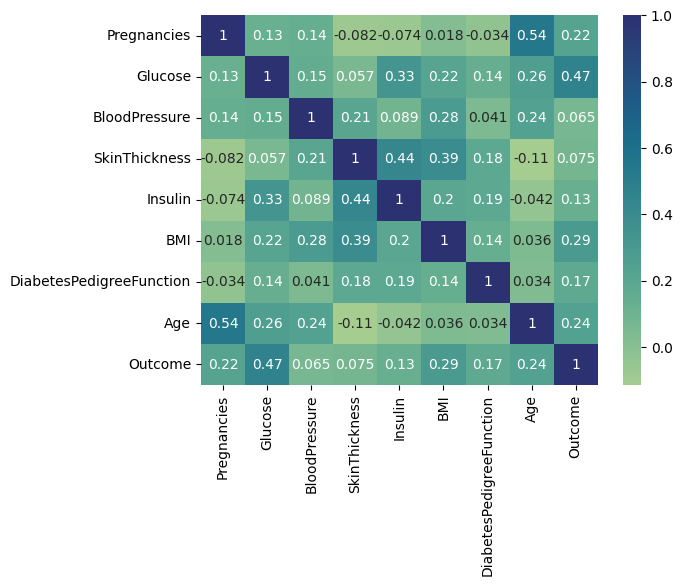

In [ ]:
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='crest')
plt.show()

We have also created a pairplot to visualize the relationships between each pair of variables in the dataset using the pairplot() function from seaborn.

This will create a scatter plot matrix for each pair of variables in the dataset, allowing us to visualize the relationships between variables. The hue='Outcome' argument will color-code the scatter plots based on the diabetes diagnosis outcome (0 or 1)

The pairplot for the diabetes dataset shows the scatter plot for each pair of variables, along with the distribution of each variable on the diagonal. The plot shows that there are some clear differences in the distribution of variables for the Outcome values of 0 and 1. For example, the distribution of Glucose, BloodPressure, SkinThickness, Insulin, and BMI are higher for Outcome=1 than for Outcome=0. This suggests that these variables may be useful in predicting the outcome variable. Additionally, the plot shows that there are some variables, such as Pregnancies and Age, that do not seem to be strongly related to the outcome variable.

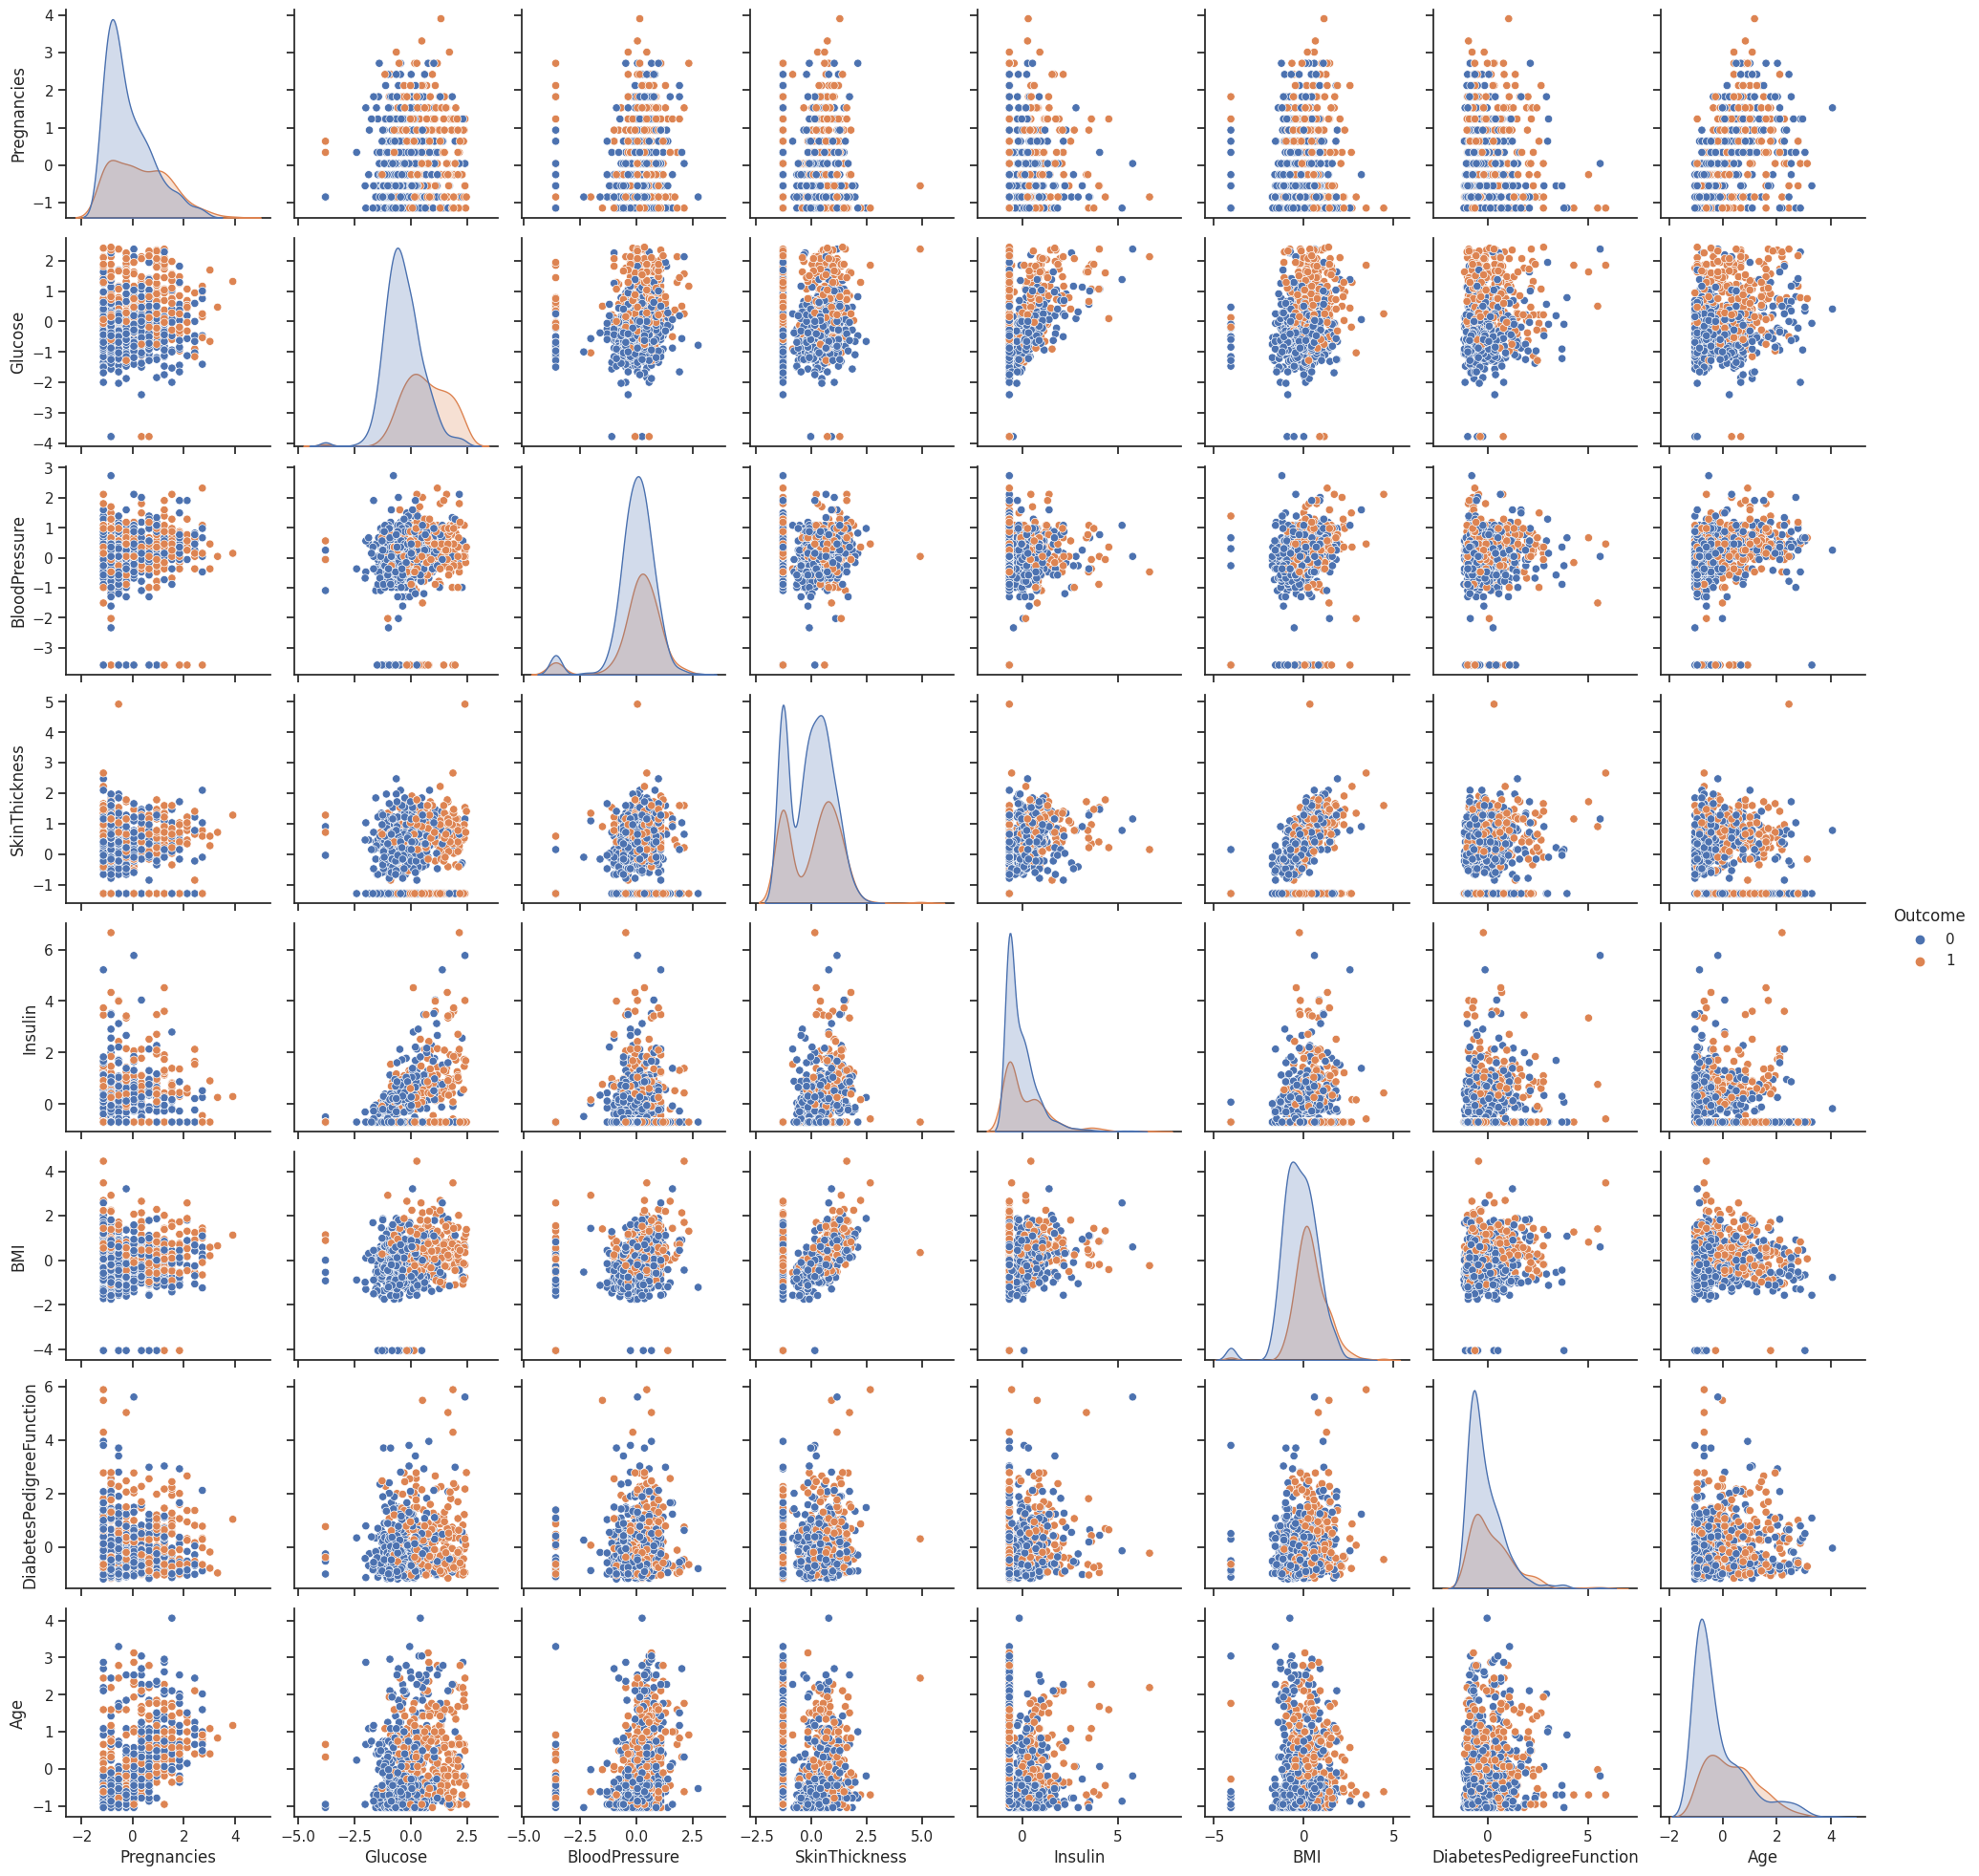

In [ ]:
sns.pairplot(diabetes_dataset, hue='Outcome')
plt.show()

## Scaling the Data

Lastly, we can perform feature scaling on the dataset. Feature scaling is the process of normalizing the range of features in the dataset. This is important because many machine learning algorithms perform better when the features are on a similar scale.

We can perform feature scaling using the StandardScaler class from the sklearn.preprocessing library.

This will normalize the range of each numerical column in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


## Analyzing Outliers

The boxplot for the diabetes dataset shows the distribution of each variable for Outcome=0 and Outcome=1. The plot shows that there are some clear differences in the distribution of variables between the two groups. For example, the median value of Glucose, BloodPressure, SkinThickness, Insulin, and BMI are higher for Outcome=1 than for Outcome=0. Additionally, there are some outliers for BloodPressure, SkinThickness, and Insulin, which suggests that these variables may need further preprocessing, such as outlier removal. Overall, the boxplot can help us identify the range and distribution of each variable, and identify potential differences between the two groups.

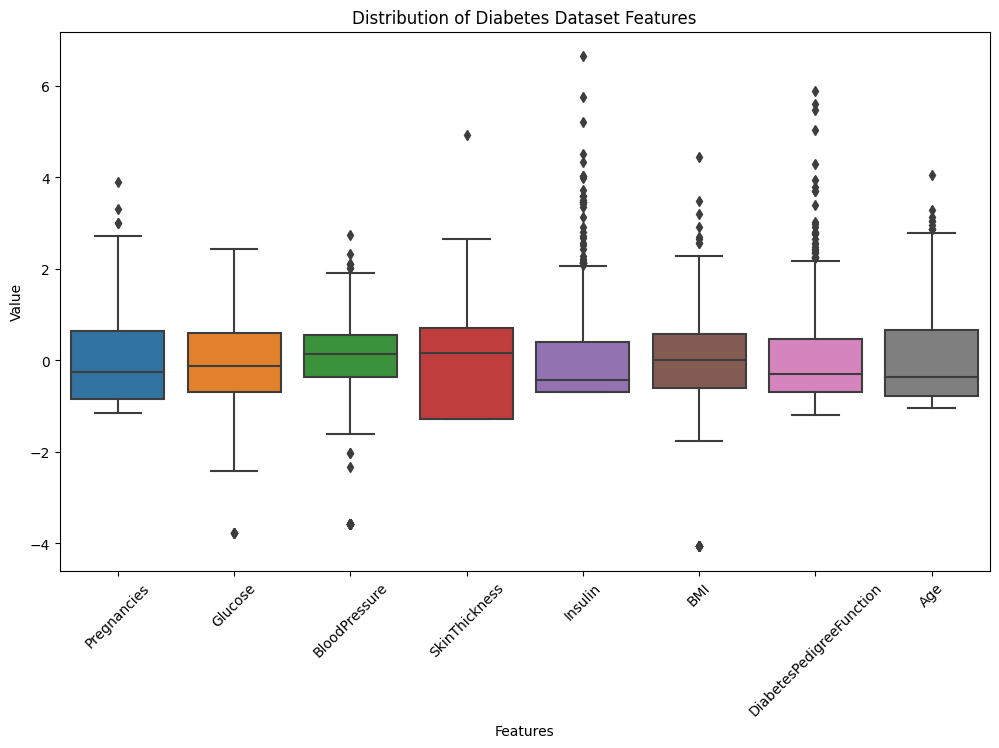

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))

# Create the boxplot after scaling the data
sns.boxplot(data=diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], ax=ax)

ax.set_title("Distribution of Diabetes Dataset Features")
ax.set_xlabel('Features')
ax.set_ylabel('Value')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Outlier Reduction
This code will calculate the Z-score for each data point in the diabetes dataset and remove any data point with a Z-score greater than 3. The Z-score is a measure of how many standard deviations a data point is away from the mean. A Z-score greater than 3 indicates that the data point is an outlier.

In [ ]:
from scipy import stats

# Remove outliers using the Z-score method
z_scores = stats.zscore(diabetes_dataset)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetes_data = diabetes_dataset[filtered_entries]


## Re-Analyzing Outliers, after outlier reduction

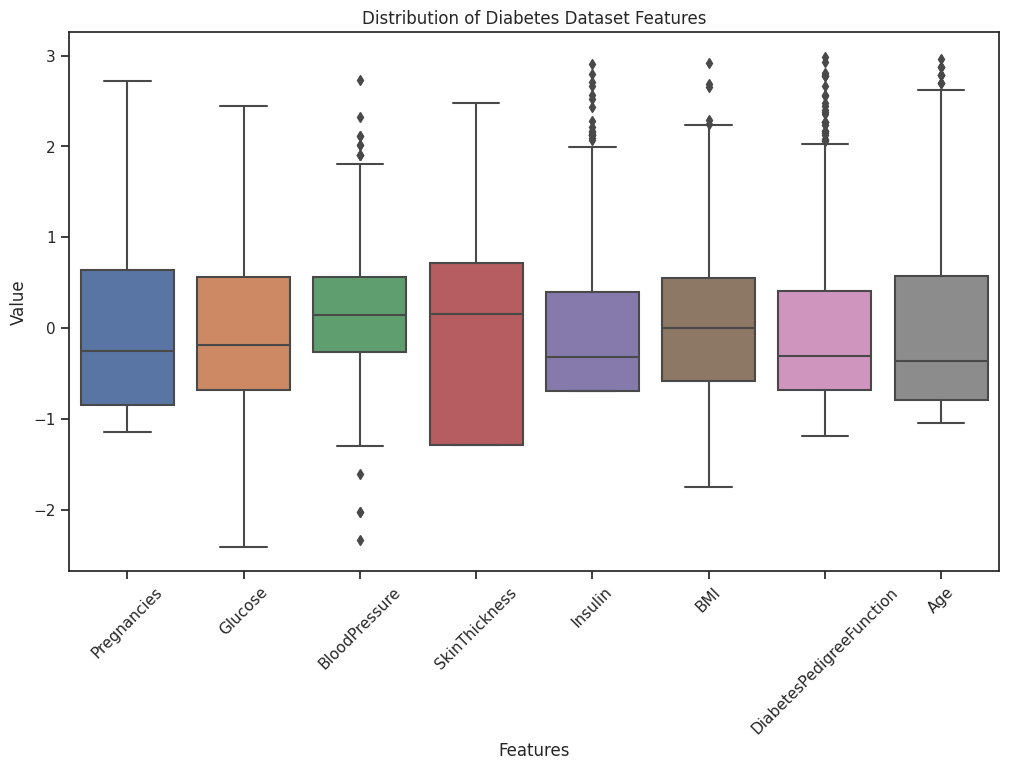

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))

# Create the boxplot after scaling the data
sns.boxplot(data=diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], ax=ax)

ax.set_title("Distribution of Diabetes Dataset Features")
ax.set_xlabel('Features')
ax.set_ylabel('Value')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()
